This notebook contains plotting code for the ROBO2N selected sequences, and code to score the ROBO1 antibodies with a model trained on the ROBO2N sort.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

import logomaker
from Levenshtein import distance

In [2]:
IPI_VL_SEQS = ['VK1-39', 'VK3-15', 'VK3-20', 'VK4-01']
# IPI_VH_SEQS = ['VH1-46', 'VH1-69', 'VH3-7', 'VH3-15', 'VH4-39', 'VH5-51']
# IPI_VH_SEQS_V2 = ['VH1-46', 'VH1-69', 'VH3-7', 'VH3-15', 'VH5-51']
# IPI_VH_VL_SEQS = [vh + '; ' + vl for vh, vl in itertools.product(IPI_VH_SEQS, IPI_VL_SEQS)]
# IPI_VH_VL_SEQS_V2 = [vh + '; ' + vl for vh, vl in itertools.product(IPI_VH_SEQS_V2, IPI_VL_SEQS)]

IPI_VH_SEQS = ['VH1-69']
IPI_3_VL_SEQS = ['VK1-39', 'VK3-15', 'VK3-20']
IPI_VK41_VL_SEQS = ['VK4-1']

In [3]:
def add_cdr3_gaps(s, max_len=20):
    s2 = s[1:]
    cut_len_L = min((len(s2)+1) // 2, max_len // 2)
    cut_len_R = min(len(s2) // 2, (max_len-1) // 2)
    gap_len = max_len - 1 - cut_len_L - cut_len_R
    s2 = s[0] + s2[:cut_len_L] + "-" * gap_len + s2[-cut_len_R:]
    return s2

In [4]:
def min_levenshtein(seq1, seqs):
    return min(distance(seq1, s, score_cutoff=len(seq1)) for s in seqs)

def min_pairwise_levenshtein(seqs):
    prev_cdr3s = [""]
    distances = []
    for cdr3 in seqs:
        distances.append(min_levenshtein(cdr3, prev_cdr3s))
        prev_cdr3s.append(cdr3)
    return distances

In [5]:
df = pd.read_csv("to_order/aff1_subset_kmer_LR_hROBO2N_Test1_Lib31_withSPR.csv")

In [6]:
df2 = pd.read_csv("scores/hROBO2N_Test1_Lib31_kmer_aff3_scores.csv")

/tmp/ipykernel_10423/3111380113.py:1: DtypeWarning: Columns (15,16,17,18,19,20,24,25,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("scores/hROBO2N_Test1_Lib31_kmer_aff3_scores.csv")


In [7]:
df.columns

Index(['CDR3', 'heavy', 'light', 'key', 'Macs1', 'Aff1', 'Aff2', 'Aff3',
       'Aff1_Macs1', 'Aff2_Macs1', 'Aff2_Aff1', 'Aff3_Macs1', 'Aff3_Aff1',
       'Aff3_Aff2', 'INDEX', 'TAB-ID', 'Antibody_Name', 'Antigen', 'HC', 'LC',
       'CDRH3', 'NGS_Aff1', 'NGS_Aff2', 'NGS_Aff3', 'PSR ', 'SEC', 'KD (nM)',
       'ka (1/Ms)', 'kdis (1/s)', 'Cell Display (Target 1) EC50 (nM)',
       'Cell Display_Cross Reactive_Human/Mouse (Target 2) EC50 (nM)',
       'Comments', 'LR_score', 'min_dist_to_ordered', 'min_pairwise_dist'],
      dtype='object')

In [8]:
df.dropna(subset="PSR ")

,CDR3,heavy,light,key,Macs1,Aff1,Aff2,Aff3,Aff1_Macs1,Aff2_Macs1,...,SEC,KD (nM),ka (1/Ms),kdis (1/s),Cell Display (Target 1) EC50 (nM),Cell Display_Cross Reactive_Human/Mouse (Target 2) EC50 (nM),Comments,LR_score,min_dist_to_ordered,min_pairwise_dist
0,CARGTWIFDY,VH1-69,VK3-15,CARGTWIFDY:VH1-69:VK3-15,NaN,248.0,9828.0,212114.0,8.276606,11.436996,...,Pass,22.40,940385.08350,0.020386,0.724261469,0.136065953,NaN,0.897746,NaN,NaN
1,CARGTWVFDY,VH1-69,VK3-15,CARGTWVFDY:VH1-69:VK3-15,2.0,409.0,7647.0,526.0,5.279839,7.689020,...,Pass,NaN,NaN,NaN,40.35779916,1.705833194,NaN,0.799098,NaN,NaN
2,CARNVEKFYAGAGFDY,VH1-69,VK3-15,CARNVEKFYAGAGFDY:VH1-69:VK3-15,NaN,69.0,1454.0,350.0,6.997284,9.526079,...,Fail,4.71,94514.03275,0.000482,0.78,0.59,NaN,0.961205,NaN,NaN
3,CARGVESYFTGTGFDP,VH1-69,VK3-15,CARGVESYFTGTGFDP:VH1-69:VK3-15,NaN,197.0,321.0,129.0,8.046381,8.015446,...,Fail,12.60,85197.19209,0.001111,68.41,70.77,NaN,0.850126,NaN,NaN
4,CARGTRIFDY,VH1-69,VK3-15,CARGTRIFDY:VH1-69:VK3-15,NaN,1.0,NaN,42.0,2.763177,0.000000,...,Pass,NaN,NaN,NaN,Fail,Fail,NaN,0.679974,NaN,NaN
5,CARGTWKFDY,VH1-69,VK3-15,CARGTWKFDY:VH1-69:VK3-15,NaN,NaN,NaN,32.0,0.000000,0.000000,...,Pass,NaN,NaN,NaN,Fail,Fail,NaN,0.660245,NaN,NaN


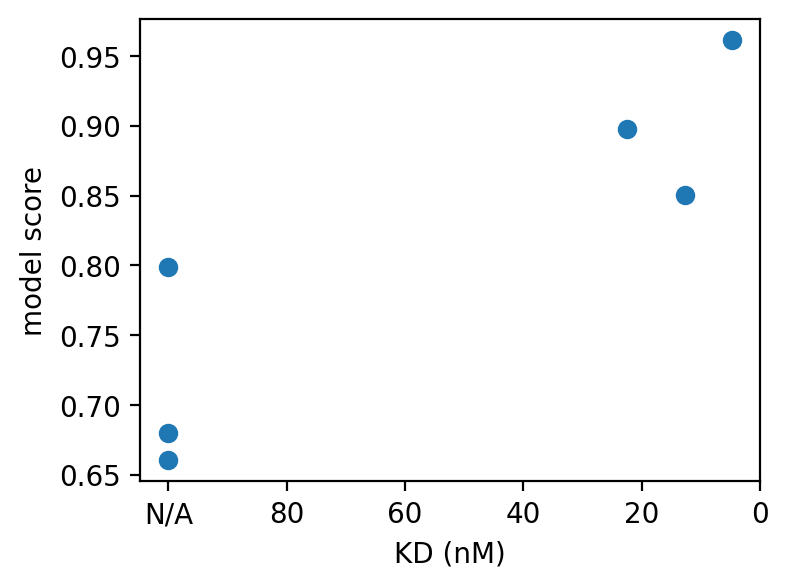

In [21]:
plot_df = df.dropna(subset="PSR ")
fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(plot_df["KD (nM)"].fillna(100), plot_df["LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "100" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

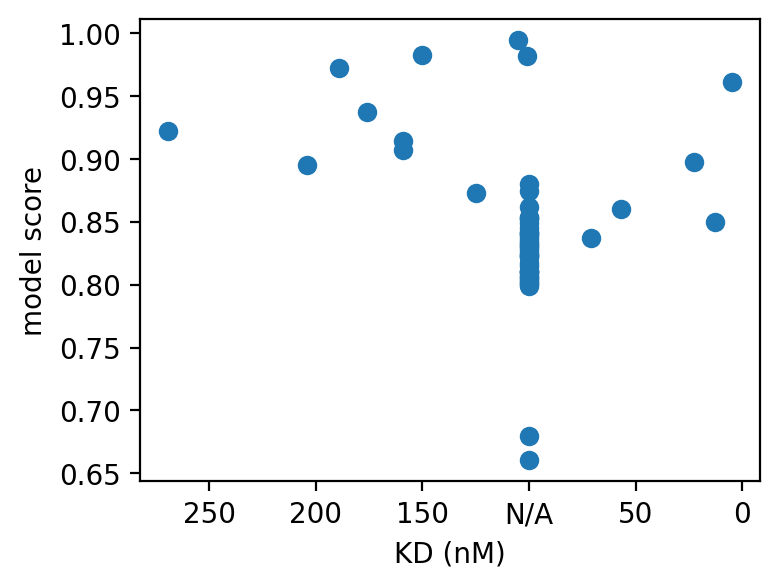

In [22]:
# plot_df = df.dropna(subset="PSR ")
fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(df["KD (nM)"].fillna(100), df["LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "100" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

In [9]:
ordered_df = df[df["Antibody_Name"].str.contains("Test1").fillna(False)]
ordered_success_df = df[df["Antibody_Name"].str.contains("Test1").fillna(False) & df["KD (nM)"].notnull()]
selected_df = df[df["Antibody_Name"].str.contains("Dmcollab").fillna(False)]
success_df = df[df["Antibody_Name"].str.contains("Dmcollab").fillna(False) & df["KD (nM)"].notnull()]

In [30]:
ordered_df["CDR3"]

0          CARGTWIFDY
1          CARGTWVFDY
2    CARNVEKFYAGAGFDY
3    CARGVESYFTGTGFDP
4          CARGTRIFDY
5          CARGTWKFDY
Name: CDR3, dtype: object

/n/groups/marks/users/aaron/anaconda3/envs/py39/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


Text(0, 0.5, 'bits')

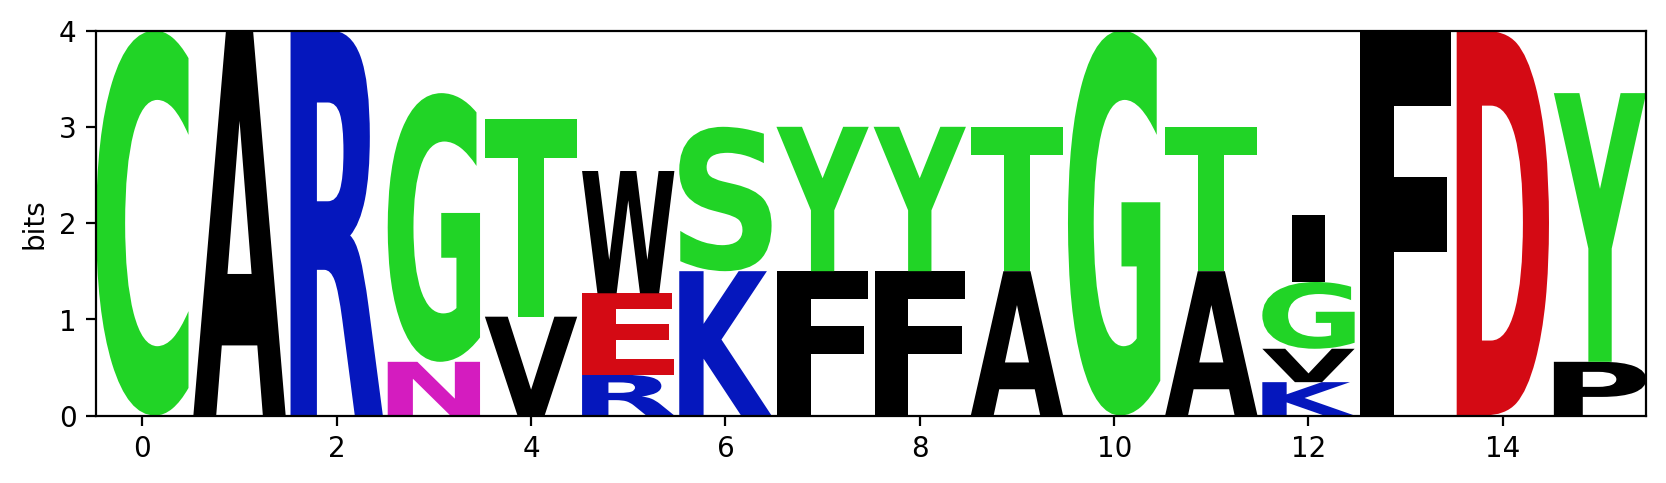

In [72]:
seqs = [add_cdr3_gaps(cdr3, max_len=ordered_df["CDR3"].str.len().max()) for cdr3 in ordered_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("bits")

/n/groups/marks/users/aaron/anaconda3/envs/py39/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


Text(0, 0.5, 'bits')

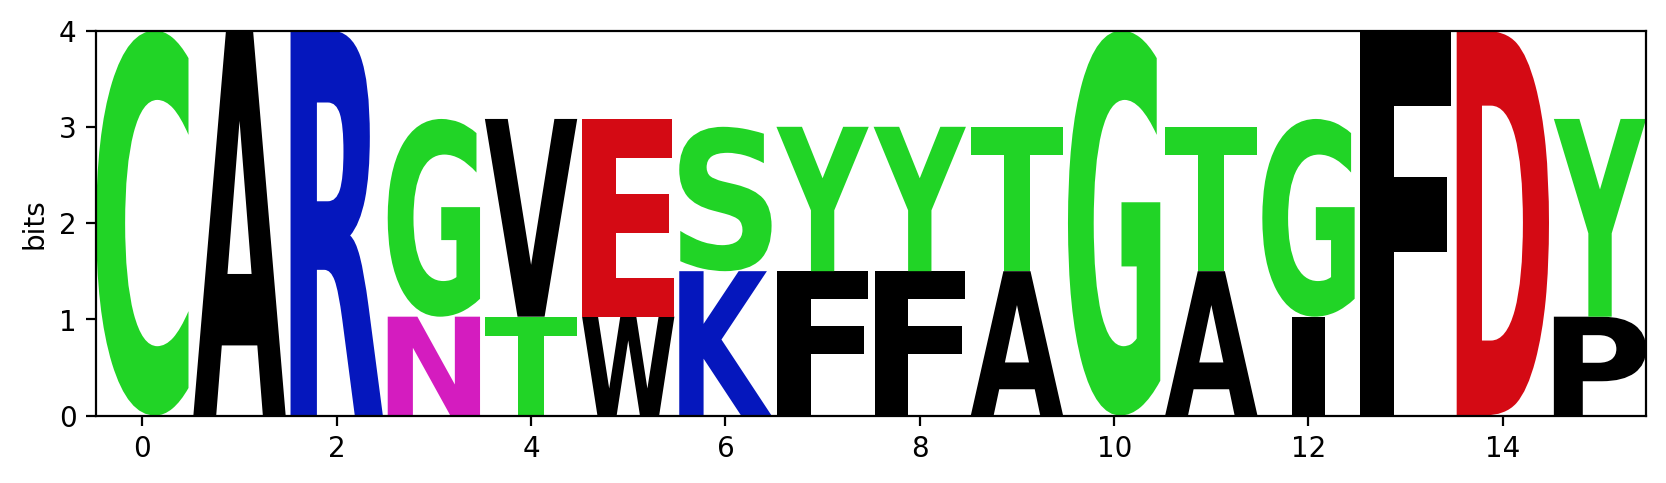

In [74]:
seqs = [add_cdr3_gaps(cdr3, max_len=ordered_success_df["CDR3"].str.len().max()) for cdr3 in ordered_success_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("bits")

In [40]:
[add_cdr3_gaps(cdr3, max_len=selected_df["CDR3"].str.len().max()) for cdr3 in selected_df["CDR3"]]

['CARSKYVY---WGDAFDY',
 'CARHGTIRPLTWGDAFDI',
 'CARGRPHRWTAWGDAFDI',
 'CARAEPARVSYWGDAFDI',
 'CARSWIQ-----LYAFDY',
 'CARSQSSQYSGWGDAFDI',
 'CARHQRGQYVAWGNAFDY',
 'CARHTPTHYALWGDAFDY',
 'CARNAEPNI--SGSAFDI',
 'CARVHSIR----YWLFDY',
 'CARSIDIAT--NEGYFDP',
 'CARGVEPYL--AGSGFDI',
 'CARGAKSY---NQIGFDY',
 'CARGYEAWY--SGSAFDP',
 'CARAVERYI--SGSGFDY',
 'CARGPLTWTASETDAFDY',
 'CARVRWVL----YAGFDY',
 'CARSPWLR----NAYFDY',
 'CARENWNYA--VYFPFDY',
 'CARIYGVT---YVWYFDP',
 'CARAILWLT-TALAGFDY',
 'CARDRPDLW--LPRGFDY',
 'CARVYGSY---PRGIFDY',
 'CARVSSFD---AYPGFDY',
 'CARNAERWL--AGSYFDP',
 'CARDEVEWGVQLYNAFDI',
 'CARNPSRES-GWGDPFDY',
 'CARDLHIGR--LANYFDP',
 'CARAIGHF---ERQGFDY']

/n/groups/marks/users/aaron/anaconda3/envs/py39/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


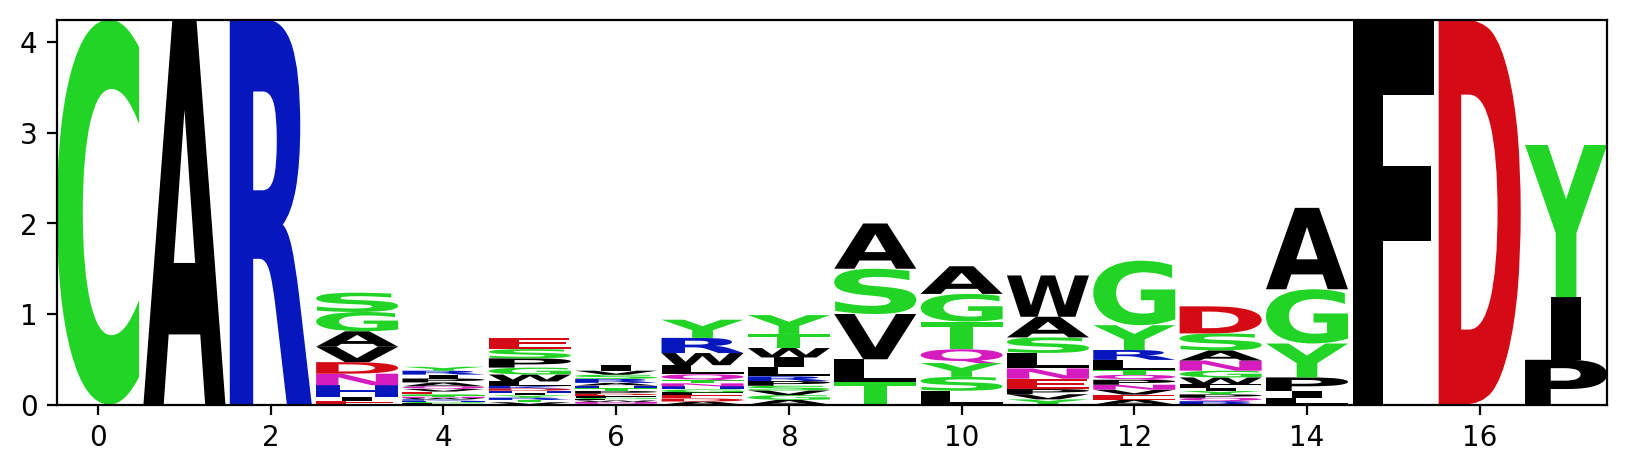

In [68]:
seqs = [add_cdr3_gaps(cdr3, max_len=selected_df["CDR3"].str.len().max()) for cdr3 in selected_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")

In [41]:
[add_cdr3_gaps(cdr3, max_len=success_df["CDR3"].str.len().max()) for cdr3 in success_df["CDR3"]]

['CARSKYVY---WGDAFDY',
 'CARHGTIRPLTWGDAFDI',
 'CARGRPHRWTAWGDAFDI',
 'CARAEPARVSYWGDAFDI',
 'CARSWIQ-----LYAFDY',
 'CARSQSSQYSGWGDAFDI',
 'CARHQRGQYVAWGNAFDY',
 'CARHTPTHYALWGDAFDY',
 'CARNAEPNI--SGSAFDI',
 'CARGVEPYL--AGSGFDI',
 'CARGYEAWY--SGSAFDP',
 'CARVSSFD---AYPGFDY']

/n/groups/marks/users/aaron/anaconda3/envs/py39/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


Text(0, 0.5, 'bits')

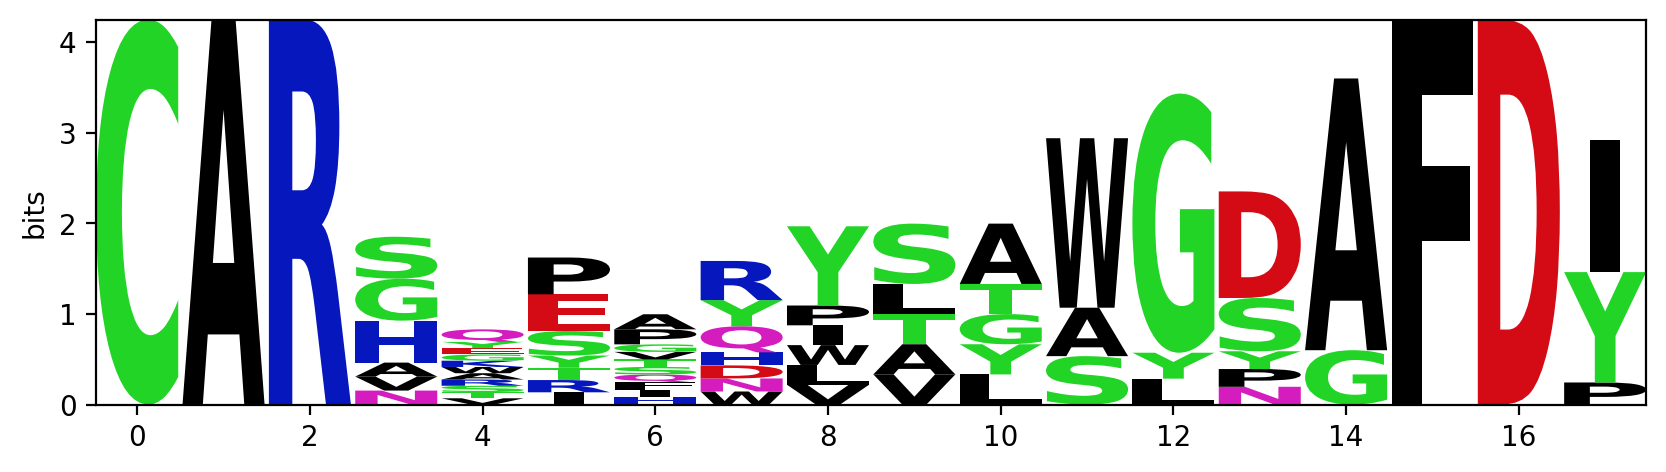

In [71]:
seqs = [add_cdr3_gaps(cdr3, max_len=success_df["CDR3"].str.len().max()) for cdr3 in success_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("bits")

/n/groups/marks/users/aaron/anaconda3/envs/py39/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


Text(0, 0.5, 'bits')

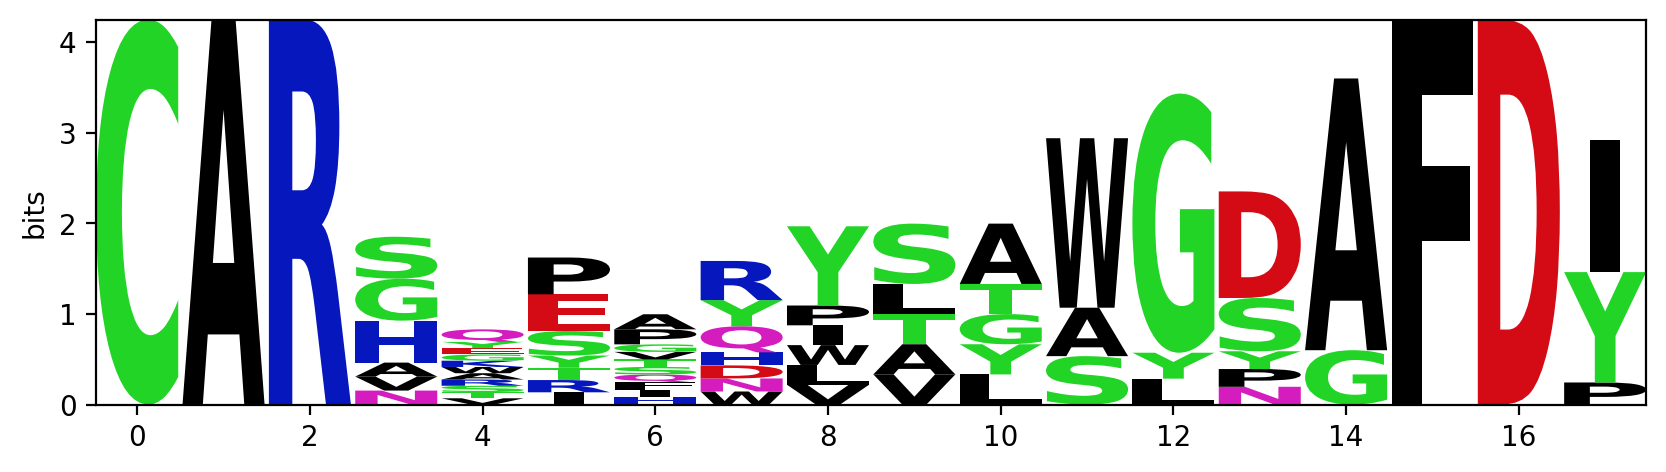

In [10]:
seqs = [add_cdr3_gaps(cdr3, max_len=success_df["CDR3"].str.len().max()) for cdr3 in success_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("bits")

/n/groups/marks/users/aaron/anaconda3/envs/py39/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


Text(0, 0.5, 'probability')

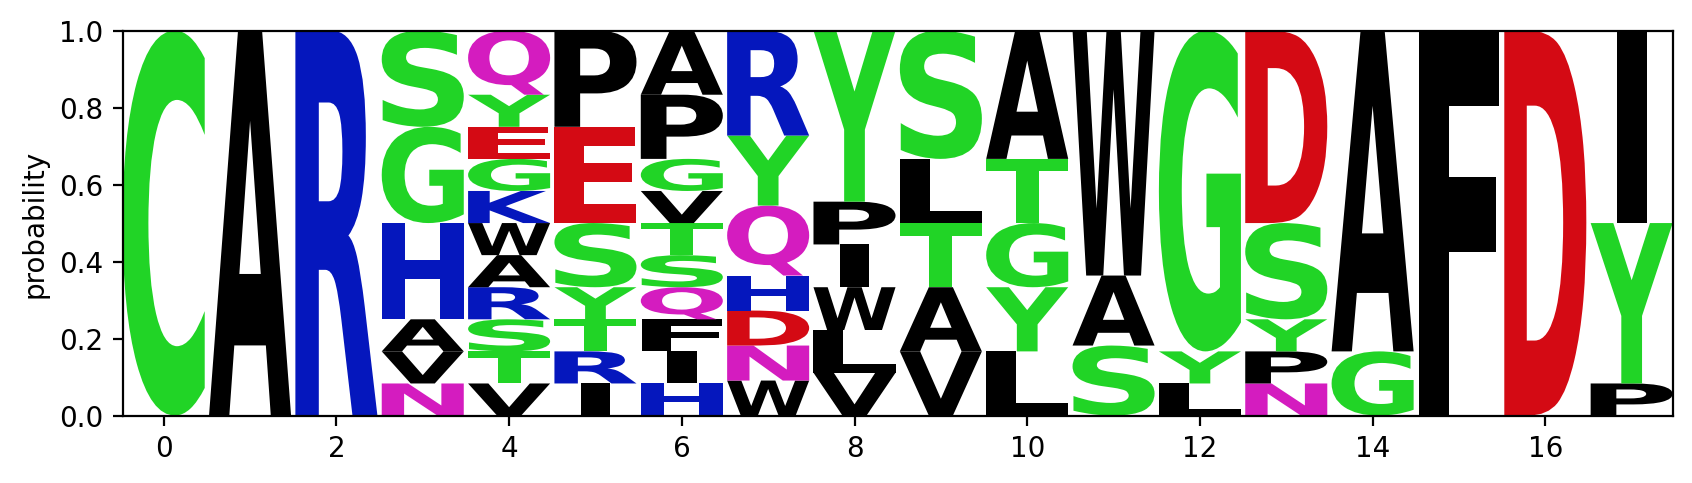

In [12]:
seqs = [add_cdr3_gaps(cdr3, max_len=success_df["CDR3"].str.len().max()) for cdr3 in success_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="probability", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("probability")

Text(0.5, 0, 'Min Dist. to FACS3')

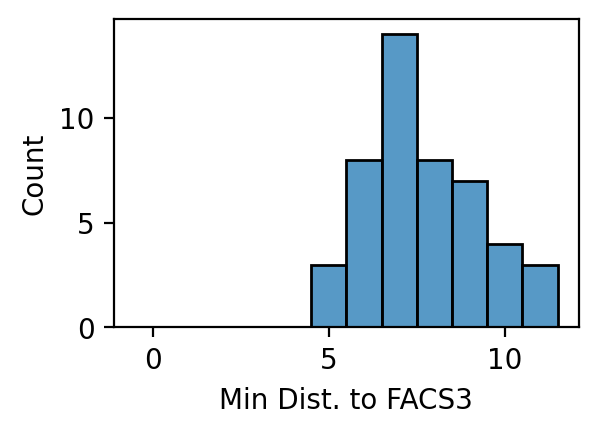

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sns.histplot(x="min_dist_to_ordered", data=df, color="C0", discrete=True, binrange=(0, 11))
plt.xlabel("Min Dist. to FACS3")

Text(0.5, 0, 'Min Dist. to FACS3')

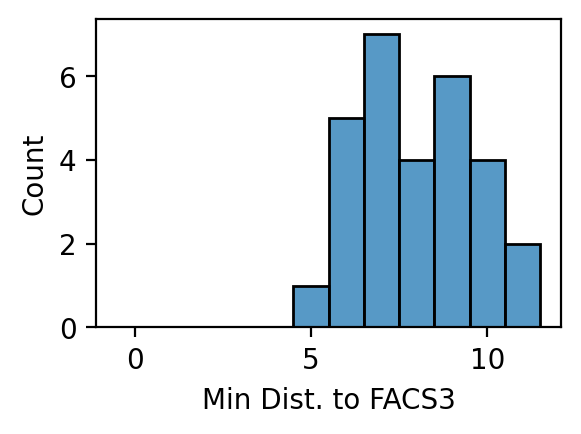

In [47]:
plot_df = df.dropna(subset=["min_dist_to_ordered", "Antibody_Name"]).copy()
plot_df["min_dist_to_facs3"] = plot_df["CDR3"].apply(min_levenshtein, seqs=df2[df2["Aff3"].fillna(0) > 0]["CDR3"])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sns.histplot(x="min_dist_to_ordered", data=plot_df, color="C0", discrete=True, binrange=(0, 11))
plt.xlabel("Min Dist. to FACS3")

## ROBO1 scores

In [5]:
import pickle

import pandas as pd
import numpy as np

import sklearn.linear_model as lm
from sklearn.metrics import roc_curve, auc
import scipy.stats as stats

In [6]:
def filter_cdr3(seqs: pd.Series):
#     return s[:3] == "CAR" and s[-3:] in {"FDY", "LDY", "FDI", "FDP"}
    return (seqs.str[:3] == "CAR") & seqs.str[-3:].isin({"FDY", "LDY", "FDI", "FDP"})

In [7]:
def normalize_abundance(df, col):
    s = df[col].fillna(0)
    s = (s / s.sum()) * 1e6
    s[s < 1] = 1
    return s

# def filter_rounds(df, cols):
#     return df[(df[cols] > 5).any(axis=1)]

def calc_enrichment(df, col1, col2, col1_min=None, col2_min=None):
    s1, s2 = normalize_abundance(df, col1), normalize_abundance(df, col2)
    enrichment = np.log(s2) - np.log(s1)
    if col1_min is not None and col2_min is not None:
        enrichment[(df[col1].fillna(0) < col1_min) & (df[col2].fillna(0) < col2_min)] = 0
    elif col1_min is not None:
        enrichment[df[col1].fillna(0) < col1_min] = 0
    elif col2_min is not None:
        enrichment[df[col2].fillna(0) < col2_min] = 0
#     enrichment[(df[[col1, col2]].fillna(0) < 2).all(axis=1)] = 0
    return enrichment

In [8]:
def get_kmer_list(seq, include_framework=''):
    if 'C' in include_framework:
        seq = 'C' + seq
    if 'W' in include_framework:
        seq = seq + 'W'
    kmer_counts = {}

    kmer_len = 1
    num_chunks = (len(seq)-kmer_len)+1
    for idx in range(0,num_chunks):
        kmer = seq[idx:idx+kmer_len]
        assert len(kmer) == kmer_len
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
        else:
            kmer_counts[kmer] = 1

    kmer_len = 2
    num_chunks = (len(seq)-kmer_len)+1
    for idx in range(0,num_chunks):
        kmer = seq[idx:idx+kmer_len]
        assert len(kmer) == kmer_len
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
        else:
            kmer_counts[kmer] = 1

    kmer_len = 3
    num_chunks = (len(seq)-kmer_len)+1
    for idx in range(0,num_chunks):
        kmer = seq[idx:idx+kmer_len]
        assert len(kmer) == kmer_len
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
        else:
            kmer_counts[kmer] = 1
    #print kmer_counts
    return [(key,val) for key,val in kmer_counts.items()]

cdr3_alphabet = 'ACDEFGHIKLMNPQRSTVWY'
kmer_to_idx = {}
counter = 0
kmer_list = [aa for aa in cdr3_alphabet]
for aa in cdr3_alphabet:
    for bb in cdr3_alphabet:
        kmer_list.append(aa+bb)
        for cc in cdr3_alphabet:
            kmer_list.append(aa+bb+cc)

kmer_to_idx = {aa: i for i, aa in enumerate(kmer_list)}

def cdr3_seqs_to_arr(seqs, include_framework=''):
    seq_to_kmer_vector = {}
    for seq in seqs:
        # Make into kmers
        kmer_data_list = get_kmer_list(seq, include_framework=include_framework)
        norm_val = 0.
        for kmer,count in kmer_data_list:
            count = float(count)
            norm_val += (count * count)
        norm_val = np.sqrt(norm_val)

        # L2 normalize
        final_kmer_data_list = []
        for kmer,count in kmer_data_list:
            final_kmer_data_list.append((kmer_to_idx[kmer],float(count)/norm_val))

        # save to a dictionary
        seq_to_kmer_vector[seq] = final_kmer_data_list

    kmer_arr = np.zeros((len(seqs), len(kmer_to_idx)), dtype=np.float32)
    for i, seq in enumerate(seqs):
        kmer_vector = seq_to_kmer_vector[seq]
        for j_kmer,val in kmer_vector:
            kmer_arr[i, j_kmer] = val
    return kmer_arr

104289
102416
75463
75463
73949	69503	69503	6262	27	NGS_data/hROBO1_Test1_Lib31.csv
75463
['VK1-39', 'VK3-15', 'VK3-20', 'VK4-01']
Categories (4, object): ['VK1-39' < 'VK3-15' < 'VK3-20' < 'VK4-01']
59159 4794 Train
14790 1198 Test
69503 1432 Aff3 Val
27 24 SPR Val
Train AUC: 0.5402864282704771
Test AUC: 0.5388510476063205
Aff3/Macs1 AUC: 0.7912992218361554
Aff3 Spearman: 0.13317516705203605


/tmp/ipykernel_13402/4106230329.py:120: DtypeWarning: Columns (15,16,17,18,19,20,24,25,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  robo1_df = pd.read_csv(f"scores/hROBO1_Test1_Lib31_kmer_aff3_scores.csv")


SPR AUC: 0.9444444444444444

WGD    18.110673
STH    14.321093
WGN    13.247707
AIG    12.726136
HNV    12.561655
         ...    
SAW   -10.272141
NRF   -10.310463
IAF   -10.552572
REW   -10.619279
SPV   -11.633461
Length: 1424, dtype: float64
A        -0.769192
C         8.938137
D        -0.084696
E        -0.340783
F         0.254216
            ...   
YWI      -5.128428
YWL       5.268954
YWY      -3.482901
VK1-39   -0.204287
VK3-20   -0.174658
Length: 1424, dtype: float64


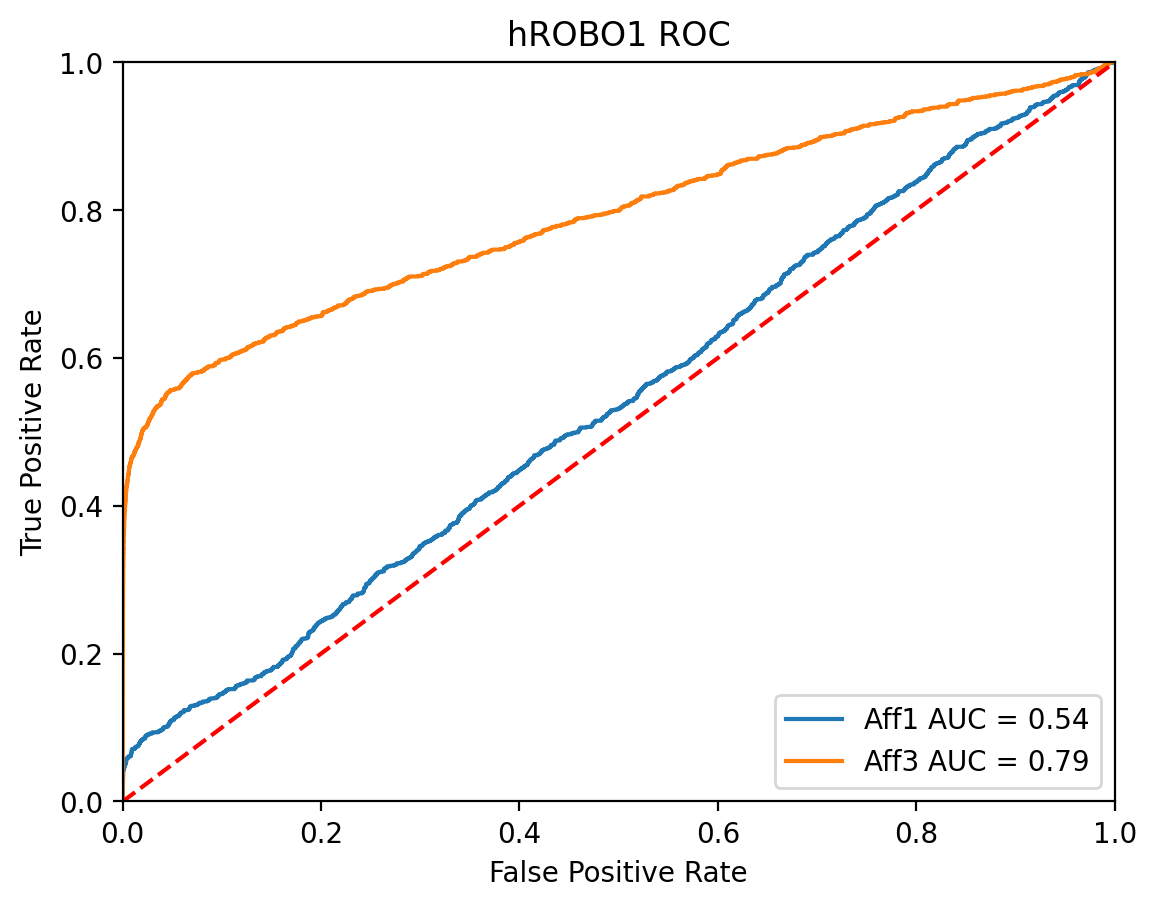

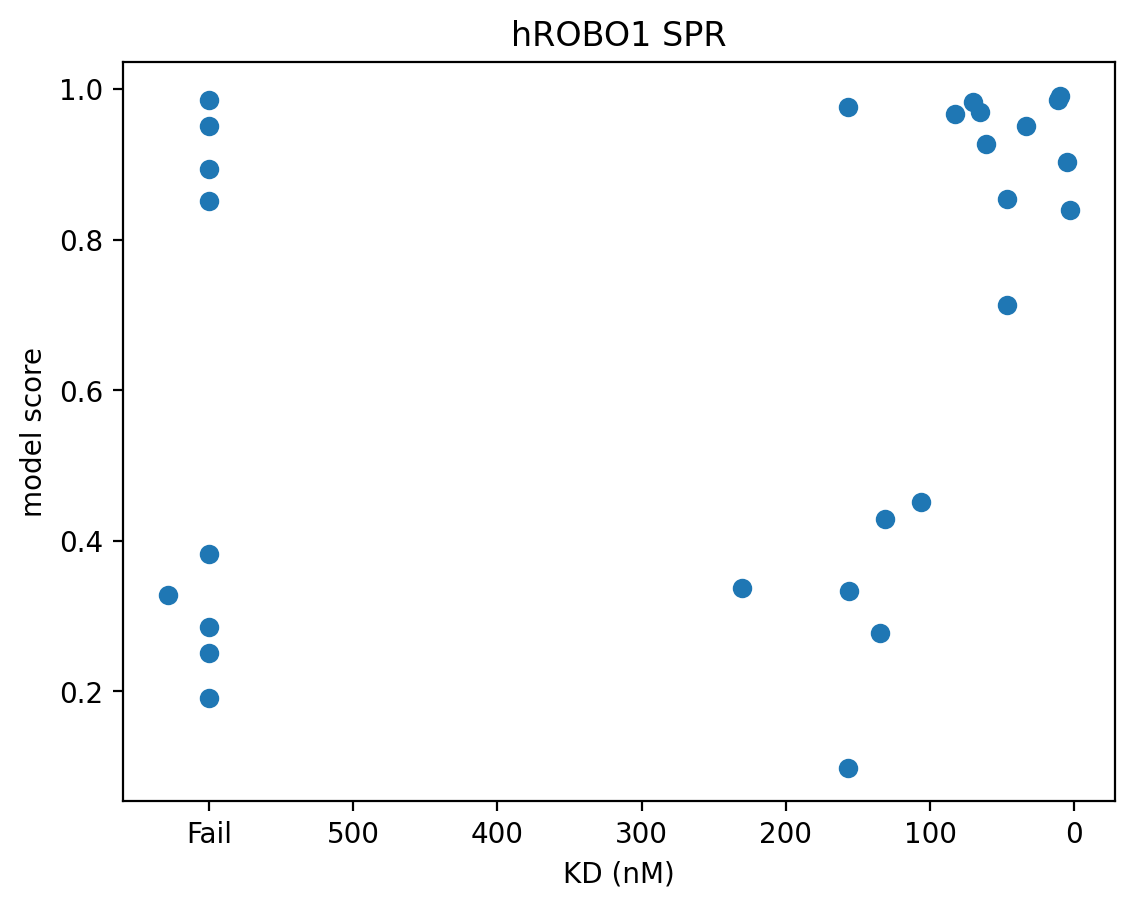

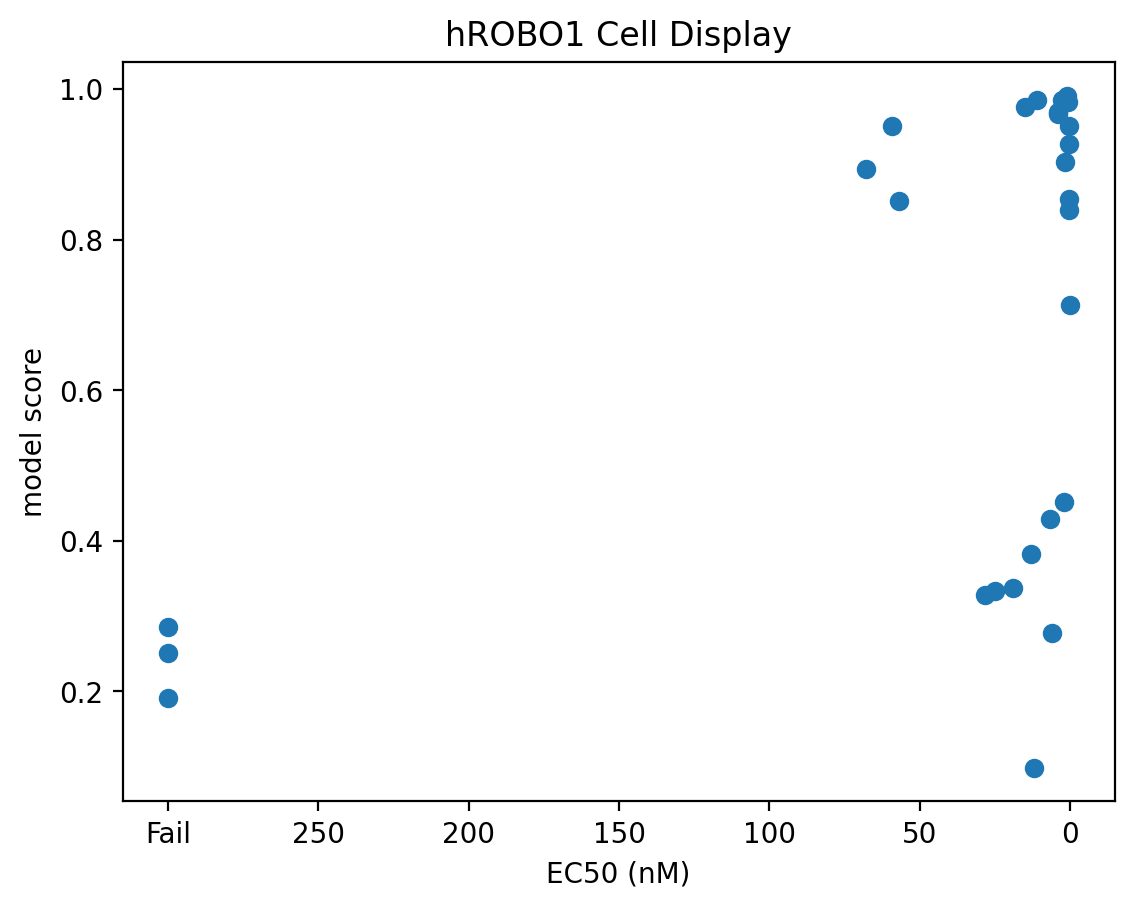

In [22]:
results = []

fname = "NGS_data/hROBO1_Test1_Lib31.csv"
target = "hROBO1"
light_chains = IPI_3_VL_SEQS
heavy_chains = IPI_VH_SEQS
antigens = ["hROBO1"]
params_file = f"params/hROBO2N_Test1_Lib31_kmer_LR.pkl"
aff3_file = f"scores/hROBO1_Test1_Lib31_hROBO2N_train_kmer_aff3_scores.csv"

df = pd.read_csv(fname)
print(len(df))
df = df[filter_cdr3(df["CDR3"])]
print(len(df))
df = df[df["light"].isin(light_chains)]
print(len(df))
df = df[df["heavy"].isin(heavy_chains)]
print(len(df))

if "Macs1" not in df.columns:
    df["Macs1"] = df["Macs1_A1"]
    df["Aff1"] = df["Aff1_A1"]
    df["Aff2"] = df["Aff2_A1"]
    df["Aff3"] = df["Aff3_Combined"]

df["Aff1_Macs1"] = calc_enrichment(df, "Macs1", "Aff1")
df["Aff2_Macs1"] = calc_enrichment(df, "Macs1", "Aff2")
df["Aff2_Aff1"] = calc_enrichment(df, "Aff1", "Aff2")
df["Aff3_Macs1"] = calc_enrichment(df, "Macs1", "Aff2")
df["Aff3_Aff1"] = calc_enrichment(df, "Aff1", "Aff3")
df["Aff3_Aff2"] = calc_enrichment(df, "Aff2", "Aff3")

char_df = pd.read_excel("Library3.1_VH1-69_AntibodyCharacterization_ForMarksLab.xlsx")
char_df = pd.read_excel("IPI_Library_pilot_10targets.xlsx")
char_df = char_df[char_df["Antigen"].isin(antigens)]
char_df.loc[char_df["LC"] == "VK4-1_C", "LC"] = "VK4-1"
char_df["key"] = char_df["CDRH3"] + ":" + char_df["HC"] + ":" + char_df["LC"]

df = pd.merge(df, char_df, on="key", how="left")

print((df["Aff1_Macs1"] != 0).sum(), (df["Aff2_Macs1"] != 0).sum(), (df["Aff3_Macs1"] != 0).sum(), (df["Aff3_Aff1"] != 0).sum(), len(char_df), fname, sep='\t')
#     assert len(df[(df["Aff1_Macs1"] != 0) & ((df["Macs1"] < 5) | df["Macs1"].isnull()) & ((df["Aff1"] < 5) | df["Aff1"].isnull())]) == 0

kmer_arr = cdr3_seqs_to_arr(df['CDR3'], include_framework='W')
# vh_onehot = pd.get_dummies(pd.Categorical(df['heavy'], categories=IPI_VH_SEQS_V2, ordered=True))
vl_onehot = pd.get_dummies(pd.Categorical(df['light'], categories=IPI_VL_SEQS, ordered=True))
length_onehot = pd.get_dummies(pd.Categorical(df['CDR3'].str.len(), ordered=True))
print(len(df))
# print(vh_onehot.columns.values)
print(vl_onehot.columns.values)
kmer_vh_vl_arr = np.concatenate([
    kmer_arr, 
#     vh_onehot.values,
    vl_onehot.values
], axis=1)
kmer_vh_vl_len_arr = np.concatenate([kmer_vh_vl_arr, length_onehot.values], axis=1)
kmer_arr_labels = kmer_list
kmer_vh_vl_arr_labels = (
    kmer_arr_labels +
#     vh_onehot.columns.tolist() +
    vl_onehot.columns.tolist()
)
kmer_vh_vl_len_arr_labels = kmer_vh_vl_arr_labels + length_onehot.columns.tolist()

char_kmer_arr = cdr3_seqs_to_arr(char_df['CDRH3'], include_framework='W')
char_vl_onehot = pd.get_dummies(pd.Categorical(char_df['LC'], categories=IPI_VL_SEQS, ordered=True))
char_kmer_vh_vl_arr = np.concatenate([
    char_kmer_arr, 
    char_vl_onehot.values
], axis=1)

X, X_labels, y = kmer_vh_vl_arr, kmer_vh_vl_arr_labels, df["Aff1_Macs1"].values
X = pd.DataFrame(X, columns=X_labels)
X, y = X[y != 0], y[y != 0]
np.random.seed(1)
msk = np.random.permutation(len(y)) < int(len(y) * 0.8)
X_train, X_test = X[msk], X[~msk]
y_train, y_test = y[msk], y[~msk]
print(len(y_train), (y_train > 0).sum(), "Train")
print(len(y_test), (y_test > 0).sum(), "Test")

X_val, y_val = kmer_vh_vl_arr, df["Aff3_Macs1"].values
X_val = pd.DataFrame(X_val, columns=X_labels)
X_val, y_val = X_val[y_val != 0], y_val[y_val != 0]
print(len(y_val), (y_val > 0).sum(), "Aff3 Val")

X_val2, y_val2 = char_kmer_vh_vl_arr, (char_df["KD (nM)"].notnull() | (pd.to_numeric(char_df["Cell Display (Target 1) EC50 (nM)"], errors="coerce") < 100))
X_val2 = pd.DataFrame(X_val2, columns=X_labels)
print(len(y_val2), (y_val2 > 0).sum(), "SPR Val")

# train model
thresh = 0.
with open(params_file, "rb") as f:
    clf = pickle.load(f)

y_score_train = clf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train > 0, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)
print("Train AUC:", roc_auc_train)

y_score = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test > 0, y_score)
roc_auc_test = auc(fpr_test, tpr_test)
print("Test AUC:", roc_auc_test)

y_score_val = clf.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, _ = roc_curve(y_val > 0, y_score_val)
roc_auc_aff3_macs1 = auc(fpr_val, tpr_val)
print("Aff3/Macs1 AUC:", roc_auc_aff3_macs1)

X, X_labels, y = kmer_vh_vl_arr, kmer_vh_vl_arr_labels, df["Aff3"].values
X = pd.DataFrame(X, columns=X_labels)
#     X, y = X[y > 0], y[y > 0]
y_score = clf.predict_proba(X)[:, 1]
spearman_aff3 = stats.spearmanr(y_score[y > 0], y[y > 0])[0]
print("Aff3 Spearman:", spearman_aff3)
save_df = df.copy()
#     save_df = save_df[save_df["Aff3"] > 0]

robo1_df = pd.read_csv(f"scores/hROBO1_Test1_Lib31_kmer_aff3_scores.csv")
save_df["ROBO1_LR_score"] = pd.merge(save_df, robo1_df, on="key", how="left")["LR_score"]

save_df["ROBO2N_LR_score"] = y_score
save_df.to_csv(aff3_file, index=False)

if len(y_val2) != 0:
    y_score_val2 = clf.predict_proba(X_val2)[:, 1]
    fpr_val2, tpr_val2, _ = roc_curve(y_val2 > 0, y_score_val2)
    roc_auc_spr = auc(fpr_val2, tpr_val2)
    print("SPR AUC:", roc_auc_spr)

print()
coefs = pd.Series(index=clf.feature_names_in_, data=clf.coef_[0])
print(coefs[coefs != 0].sort_values(ascending=False))
print(coefs[coefs != 0])

results.append(dict(
    fname=fname,
    n_params=clf.coef_.shape[1],
    nonzero_params=(clf.coef_ != 0).sum(),
    roc_auc_train=roc_auc_train,
    roc_auc_test=roc_auc_test,
    spearman_aff3=spearman_aff3,
    roc_auc_aff3_macs1=roc_auc_aff3_macs1,
    roc_auc_spr=roc_auc_spr,
    train_size=len(y_train),
    train_positive=(y_train > 0).sum(),
    test_size=len(y_test),
    test_positive=(y_test > 0).sum(),
    aff3_size=len(y_val),
    aff3_positive=(y_val > 0).sum(),
    spr_size=len(y_val2),
    spr_positive=(y_val2 > 0).sum(),
))

# method I: plt
plt.title(f"{target} ROC")
plt.plot(fpr_test, tpr_test, 'C0', label = 'Aff1 AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_val, tpr_val, 'C1', label = 'Aff3 AUC = %0.2f' % roc_auc_aff3_macs1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fig, ax = plt.subplots()
plt.title(f"{target} SPR")
plt.scatter(char_df["KD (nM)"].fillna(600), y_score_val2)
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["Fail" if item == "600" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

fig, ax = plt.subplots()
plt.title(f"{target} Cell Display")
plt.scatter(char_df["Cell Display (Target 1) EC50 (nM)"].replace("Fail", 300), y_score_val2)
plt.gca().invert_xaxis()
plt.ylabel("model score")
plt.xlabel("EC50 (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["Fail" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

In [23]:
df[df['Antibody_Name'].notnull()]

,CDR3,heavy,light,key,Macs1,Aff1,Aff2,Aff3,Aff1_Macs1,Aff2_Macs1,...,NGS_Aff2,NGS_Aff3,PSR,SEC,KD (nM),ka (1/Ms),kdis (1/s),Cell Display (Target 1) EC50 (nM),Cell Display_Cross Reactive_Human/Mouse (Target 2) EC50 (nM),Comments
1,CARAVSWQSGWEGFDI,VH1-69,VK3-20,CARAVSWQSGWEGFDI:VH1-69:VK3-20,NaN,16.0,407.0,17450.0,5.526112,8.466942,...,407.0,17450.0,Pass,Pass,NaN,NaN,NaN,Fail,Fail,NaN
2,CARTVEQWFAGSGFDI,VH1-69,VK3-15,CARTVEQWFAGSGFDI:VH1-69:VK3-15,NaN,30.0,1779.0,14591.0,6.154721,9.941935,...,1779.0,14591.0,Pass,Pass,46.786002,25081.800535,0.001167,0.21,1.17,Same CDR3 in ROBO2N (not ordered)
3,CARNVERNYAGSGFDI,VH1-69,VK3-15,CARNVERNYAGSGFDI:VH1-69:VK3-15,NaN,26.0,959.0,4711.0,6.011620,9.324019,...,959.0,4711.0,Pass,Pass,61.286322,43009.468531,0.002549,0.26,0.45,NaN
5,CARGTYILDY,VH1-69,VK3-20,CARGTYILDY:VH1-69:VK3-20,NaN,62.0,1635.0,3041.0,6.880658,9.857526,...,1635.0,3041.0,Pass,Pass,NaN,NaN,NaN,68.049145,85.613053,NaN
7,CARERVSYRGWYFDY,VH1-69,VK1-39,CARERVSYRGWYFDY:VH1-69:VK1-39,NaN,12.0,60.0,1907.0,5.238430,6.552473,...,60.0,1907.0,Fail,Pass,NaN,NaN,NaN,Fail,Fail,NaN
8,CARNAEEWISGSAFDY,VH1-69,VK3-15,CARNAEEWISGSAFDY:VH1-69:VK3-15,NaN,25.0,625.0,1812.0,5.972399,8.895880,...,625.0,1812.0,Fail,Pass,33.375328,30057.242760,0.000990,0.55,2.02,NaN
9,CARSGAVYWGDAFDY,VH1-69,VK3-15,CARSGAVYWGDAFDY:VH1-69:VK3-15,NaN,31.0,688.0,1473.0,6.187511,8.991917,...,688.0,1473.0,Fail,Pass,82.318070,18125.218412,0.001478,4.14,9.78,NaN
12,CARDYDPFYRTYRGTFDI,VH1-69,VK3-15,CARDYDPFYRTYRGTFDI:VH1-69:VK3-15,NaN,83.0,257.0,860.0,7.172364,8.007204,...,257.0,860.0,Pass,Pass,628.540044,3746.119721,0.001791,28.29,Fail,NaN
13,CARAVERYISGSGFDY,VH1-69,VK3-15,CARAVERYISGSGFDY:VH1-69:VK3-15,NaN,166.0,2049.0,813.0,7.865511,10.083236,...,2049.0,813.0,Pass,Pass,46.904511,27529.331366,0.001285,0.49,1.93,NaN
14,CARVALAYWGDAFDY,VH1-69,VK3-15,CARVALAYWGDAFDY:VH1-69:VK3-15,NaN,28.0,1125.0,774.0,6.085728,9.483667,...,1125.0,774.0,Pass,Pass,70.351136,21831.413539,0.001532,0.65,3.09,NaN


In [24]:
save_df[save_df["Antibody_Name"].notnull()]

,CDR3,heavy,light,key,Macs1,Aff1,Aff2,Aff3,Aff1_Macs1,Aff2_Macs1,...,PSR,SEC,KD (nM),ka (1/Ms),kdis (1/s),Cell Display (Target 1) EC50 (nM),Cell Display_Cross Reactive_Human/Mouse (Target 2) EC50 (nM),Comments,ROBO1_LR_score,ROBO2N_LR_score
1,CARAVSWQSGWEGFDI,VH1-69,VK3-20,CARAVSWQSGWEGFDI:VH1-69:VK3-20,NaN,16.0,407.0,17450.0,5.526112,8.466942,...,Pass,Pass,NaN,NaN,NaN,Fail,Fail,NaN,0.789583,0.250929
2,CARTVEQWFAGSGFDI,VH1-69,VK3-15,CARTVEQWFAGSGFDI:VH1-69:VK3-15,NaN,30.0,1779.0,14591.0,6.154721,9.941935,...,Pass,Pass,46.786002,25081.800535,0.001167,0.21,1.17,Same CDR3 in ROBO2N (not ordered),0.776607,0.712632
3,CARNVERNYAGSGFDI,VH1-69,VK3-15,CARNVERNYAGSGFDI:VH1-69:VK3-15,NaN,26.0,959.0,4711.0,6.011620,9.324019,...,Pass,Pass,61.286322,43009.468531,0.002549,0.26,0.45,NaN,0.724074,0.926475
5,CARGTYILDY,VH1-69,VK3-20,CARGTYILDY:VH1-69:VK3-20,NaN,62.0,1635.0,3041.0,6.880658,9.857526,...,Pass,Pass,NaN,NaN,NaN,68.049145,85.613053,NaN,0.699108,0.893259
7,CARERVSYRGWYFDY,VH1-69,VK1-39,CARERVSYRGWYFDY:VH1-69:VK1-39,NaN,12.0,60.0,1907.0,5.238430,6.552473,...,Fail,Pass,NaN,NaN,NaN,Fail,Fail,NaN,0.522970,0.285860
8,CARNAEEWISGSAFDY,VH1-69,VK3-15,CARNAEEWISGSAFDY:VH1-69:VK3-15,NaN,25.0,625.0,1812.0,5.972399,8.895880,...,Fail,Pass,33.375328,30057.242760,0.000990,0.55,2.02,NaN,0.728571,0.951080
9,CARSGAVYWGDAFDY,VH1-69,VK3-15,CARSGAVYWGDAFDY:VH1-69:VK3-15,NaN,31.0,688.0,1473.0,6.187511,8.991917,...,Fail,Pass,82.318070,18125.218412,0.001478,4.14,9.78,NaN,0.940421,0.966560
12,CARDYDPFYRTYRGTFDI,VH1-69,VK3-15,CARDYDPFYRTYRGTFDI:VH1-69:VK3-15,NaN,83.0,257.0,860.0,7.172364,8.007204,...,Pass,Pass,628.540044,3746.119721,0.001791,28.29,Fail,NaN,0.899658,0.328184
13,CARAVERYISGSGFDY,VH1-69,VK3-15,CARAVERYISGSGFDY:VH1-69:VK3-15,NaN,166.0,2049.0,813.0,7.865511,10.083236,...,Pass,Pass,46.904511,27529.331366,0.001285,0.49,1.93,NaN,0.741335,0.853856
14,CARVALAYWGDAFDY,VH1-69,VK3-15,CARVALAYWGDAFDY:VH1-69:VK3-15,NaN,28.0,1125.0,774.0,6.085728,9.483667,...,Pass,Pass,70.351136,21831.413539,0.001532,0.65,3.09,NaN,0.969176,0.983078


In [25]:
char_df

,INDEX,TAB-ID,Antibody_Name,Antigen,HC,LC,CDRH3,NGS_Aff1,NGS_Aff2,NGS_Aff3,PSR,SEC,KD (nM),ka (1/Ms),kdis (1/s),Cell Display (Target 1) EC50 (nM),Cell Display_Cross Reactive_Human/Mouse (Target 2) EC50 (nM),Comments,key
125,126,TAB0011566,hROBO1_Test1_Lib31_Ab_001,hROBO1,VH1-69,VK3-20,CARAVSWQSGWEGFDI,16.0,407.0,17450.0,Pass,Pass,NaN,NaN,NaN,Fail,Fail,NaN,CARAVSWQSGWEGFDI:VH1-69:VK3-20
126,127,TAB0011567,hROBO1_Test1_Lib31_Ab_002,hROBO1,VH1-69,VK3-15,CARTVEQWFAGSGFDI,30.0,1779.0,14591.0,Pass,Pass,46.786002,25081.800535,0.001167,0.21,1.17,Same CDR3 in ROBO2N (not ordered),CARTVEQWFAGSGFDI:VH1-69:VK3-15
127,128,TAB0011568,hROBO1_Test1_Lib31_Ab_003,hROBO1,VH1-69,VK3-15,CARNVERNYAGSGFDI,26.0,959.0,4711.0,Pass,Pass,61.286322,43009.468531,0.002549,0.26,0.45,NaN,CARNVERNYAGSGFDI:VH1-69:VK3-15
128,129,TAB0011569,hROBO1_Test1_Lib31_Ab_004,hROBO1,VH1-69,VK1-39,CARERVSYRGWYFDY,12.0,60.0,1907.0,Fail,Pass,NaN,NaN,NaN,Fail,Fail,NaN,CARERVSYRGWYFDY:VH1-69:VK1-39
129,130,TAB0011570,hROBO1_Test1_Lib31_Ab_005,hROBO1,VH1-69,VK3-15,CARNAEEWISGSAFDY,25.0,625.0,1812.0,Fail,Pass,33.375328,30057.242760,0.000990,0.55,2.02,NaN,CARNAEEWISGSAFDY:VH1-69:VK3-15
130,131,TAB0011571,hROBO1_Test1_Lib31_Ab_006,hROBO1,VH1-69,VK3-15,CARSGAVYWGDAFDY,31.0,688.0,1473.0,Fail,Pass,82.318070,18125.218412,0.001478,4.14,9.78,NaN,CARSGAVYWGDAFDY:VH1-69:VK3-15
131,132,TAB0011572,hROBO1_Test1_Lib31_Ab_007,hROBO1,VH1-69,VK3-15,CARDYDPFYRTYRGTFDI,83.0,257.0,860.0,Pass,Pass,628.540044,3746.119721,0.001791,28.29,Fail,NaN,CARDYDPFYRTYRGTFDI:VH1-69:VK3-15
132,133,TAB0011573,hROBO1_Test1_Lib31_Ab_008,hROBO1,VH1-69,VK3-15,CARAVERYISGSGFDY,166.0,2049.0,813.0,Pass,Pass,46.904511,27529.331366,0.001285,0.49,1.93,NaN,CARAVERYISGSGFDY:VH1-69:VK3-15
133,134,TAB0011574,hROBO1_Test1_Lib31_Ab_009,hROBO1,VH1-69,VK3-15,CARVALAYWGDAFDY,28.0,1125.0,774.0,Pass,Pass,70.351136,21831.413539,0.001532,0.65,3.09,NaN,CARVALAYWGDAFDY:VH1-69:VK3-15
134,135,TAB0011575,hROBO1_Test1_Lib31_Ab_010,hROBO1,VH1-69,VK3-20,CARPPQPFYATNQWYFDI,21.0,205.0,566.0,Pass,Pass,131.507800,11324.829546,0.001449,6.8,305.35,NaN,CARPPQPFYATNQWYFDI:VH1-69:VK3-20


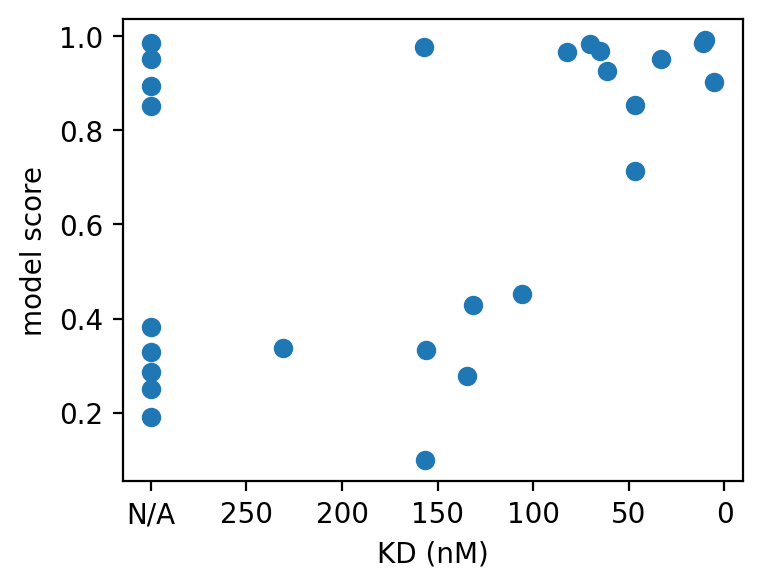

In [30]:
plot_df = save_df[save_df["Antibody_Name"].notnull()].copy()
plot_df.loc[plot_df["KD (nM)"] > 300, "KD (nM)"] = np.nan
fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(plot_df["KD (nM)"].fillna(300), plot_df["ROBO2N_LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

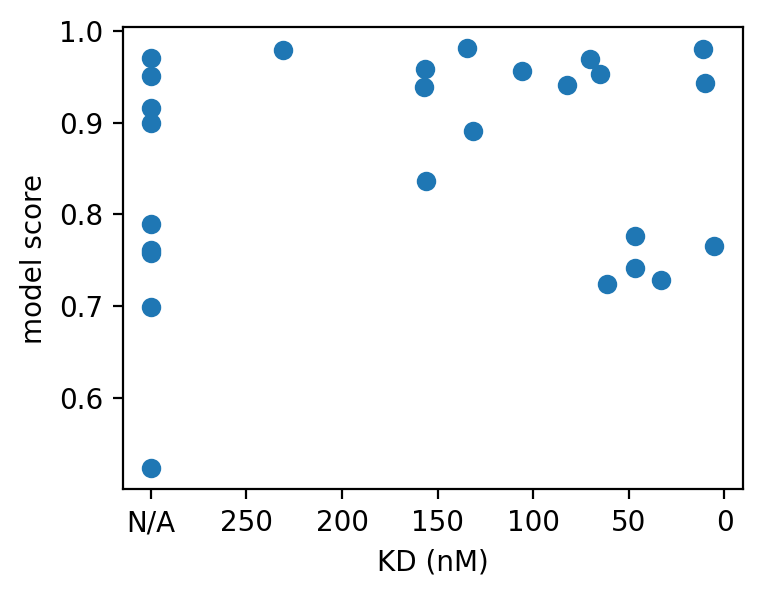

In [34]:
plot_df = save_df[save_df["Antibody_Name"].notnull()].copy()
plot_df.loc[plot_df["KD (nM)"] > 300, "KD (nM)"] = np.nan
fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(plot_df["KD (nM)"].fillna(300), plot_df["ROBO1_LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

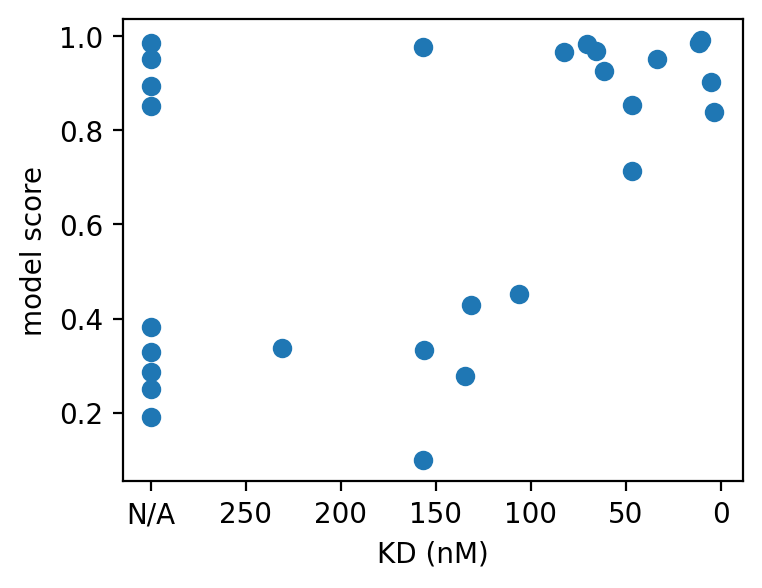

In [33]:
plot_df = char_df.copy()
plot_df['LR_score'] = y_score_val2
plot_df.loc[plot_df["KD (nM)"] > 300, "KD (nM)"] = np.nan

fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(plot_df["KD (nM)"].fillna(300), plot_df["LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

In [42]:
plot_df[plot_df["Antibody_Name"].isin([
    "hROBO1_Test1_Lib31_Ab_006",
    "hROBO1_Test1_Lib31_Ab_009",
    "hROBO1_Test1_Lib31_Ab_014",
    "hROBO1_Test1_Lib31_Ab_021",
    "hROBO1_Test1_Lib31_Ab_022",
    "hROBO1_Test1_Lib31_Ab_025",
])]

,INDEX,TAB-ID,Antibody_Name,Antigen,HC,LC,CDRH3,NGS_Aff1,NGS_Aff2,NGS_Aff3,PSR,SEC,KD (nM),ka (1/Ms),kdis (1/s),Cell Display (Target 1) EC50 (nM),Cell Display_Cross Reactive_Human/Mouse (Target 2) EC50 (nM),Comments,key,LR_score
130,131,TAB0011571,hROBO1_Test1_Lib31_Ab_006,hROBO1,VH1-69,VK3-15,CARSGAVYWGDAFDY,31.0,688.0,1473.0,Fail,Pass,82.318070,18125.218412,0.001478,4.14,9.78,NaN,CARSGAVYWGDAFDY:VH1-69:VK3-15,0.966560
133,134,TAB0011574,hROBO1_Test1_Lib31_Ab_009,hROBO1,VH1-69,VK3-15,CARVALAYWGDAFDY,28.0,1125.0,774.0,Pass,Pass,70.351136,21831.413539,0.001532,0.65,3.09,NaN,CARVALAYWGDAFDY:VH1-69:VK3-15,0.983078
138,139,TAB0011579,hROBO1_Test1_Lib31_Ab_014,hROBO1,VH1-69,VK3-15,CARSQYEYWGDAFDY,22.0,1033.0,345.0,Pass,Pass,65.339417,21207.516599,0.001379,4.08,13.27,NaN,CARSQYEYWGDAFDY:VH1-69:VK3-15,0.969259
145,146,TAB0013056,hROBO1_Test1_Lib31_Ab_021,hROBO1,VH1-69,VK3-15,CARSGSLYWGDAFDY,52.0,1023.0,372.0,Pass,Pass,11.100000,943248.460487,0.010444,2.872004,9.970515,NaN,CARSGSLYWGDAFDY:VH1-69:VK3-15,0.985481
146,147,TAB0013057,hROBO1_Test1_Lib31_Ab_022,hROBO1,VH1-69,VK3-15,CARSQSKYWGDAFDY,162.0,1766.0,313.0,Pass,Pass,10.100000,849111.931676,0.008329,1.029244,4.313213,NaN,CARSQSKYWGDAFDY:VH1-69:VK3-15,0.990847
149,150,TAB0013060,hROBO1_Test1_Lib31_Ab_025,hROBO1,VH1-69,VK3-15,CARGSAVYWGDAFDY,22.0,553.0,113.0,Pass,Pass,NaN,NaN,NaN,11.14281,24.95778,NaN,CARGSAVYWGDAFDY:VH1-69:VK3-15,0.985680
